# <CENTER>TOPIC MODELING</CENTER>

## CLASSWORK-7 

## IMPORTING AND READING CSV FILE

THIS CODE SNIPPET READS A CSV FILE USING THE PANDAS LIBRARY. THE FILE PATH IS SPECIFIED, AND ONCE THE FILE IS READ, THE FIRST 20 ROWS OF THE DATAFRAME ARE DISPLAYED.

In [35]:
import pandas as pd
file = "C:\\Users\\laxmi\\Desktop\\csv files\\un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(20)


session  year country                     country_name  \
0        25  1970     ALB                          Albania   
1        25  1970     ARG                        Argentina   
2        25  1970     AUS                        Australia   
3        25  1970     AUT                          Austria   
4        25  1970     BEL                          Belgium   
5        25  1970     BLR                          Belarus   
6        25  1970     BOL  Bolivia, Plurinational State of   
7        25  1970     BRA                           Brazil   
8        25  1970     CAN                           Canada   
9        25  1970     CMR                         Cameroon   
10       25  1970     COG                            Congo   
11       25  1970     COL                         Colombia   
12       25  1970     CRI                       Costa Rica   
13       25  1970     CUB                             Cuba   
14       25  1970     DOM               Dominican Republic   
15       25  1970     DZA                          Algeria   
16       25  1970     ECU                          Ecuador   
17       25  1970     FRA                           France   
18       25  1970     GBR                   United Kingdom   
19       25  1970     GHA                            Ghana   

                  speaker    position  \
0                 Mr. NAS         NaN   
1      Mr. DE PABLO PARDO         NaN   
2             Mr. McMAHON         NaN   
3      Mr. KIRCHSCHLAEGER         NaN   
4              Mr. HARMEL         NaN   
5          Mr. GURINOVICH         NaN   
6      Mr. CAMACHO OMISTE         NaN   
7      Mr. GIBSON BARBOZA         NaN   
8               Mr. SHARP         NaN   
9              Mr. AHIDJO  President    
10            Mr. ICKONGA         NaN   
11  Mr. VASQUEZ CARRIZOSA         NaN   
12              Mr. FACIO         NaN   
13            Mr. ALARCON         NaN   
14        Mr FERNANDEZ G.               
15              Mr. YAZID         NaN   
16            Mr. Benites         NaN   
17           Mr. SCHUMANN         NaN   
18   Sir Alec DOUGLASHOME         NaN   
19              Mr. OWUSU         NaN   

                                                 text  
0   33: May I first convey to our President the co...  
1   177.\t : It is a fortunate coincidence that pr...  
2   100.\t  It is a pleasure for me to extend to y...  
3   155.\t  May I begin by expressing to Ambassado...  
4   176. No doubt each of us, before coming up to ...  
5   \n71.\t. We are today mourning the untimely de...  
6   135.\t  I wish to congratulate the President o...  
7   1.\tMr. President, I should like, first of all...  
8   \nThe General Assembly is fortunate indeed to ...  
9   : A year ago I came here as the Acting Preside...  
10  122.\t  I cannot begin my intervention without...  
11  Mr. President, this visit to the United Nation...  
12  62.\t  Mr. President, your election to the Pre...  
13  1.\t  Mr. President, I should first like to co...  
14  \n\n\n Mr. President, it was a source of great...  
15  1.  The delegation of Algeria is very pleased ...  
16  71.  It had been my hope that a loftier person...  
17  84.\t  Within one month, when we celebrate the...  
18  110.\t Mr. President, I should like first to s...  
19  121.\t I should like to begin by congratulatin...

## TAKING COUPLE OF TEXTS

THE CODE PRINTS THE REPRESENTATION OF A SPECIFIC PORTION OF TEXT FROM TWO ROWS OF THE DATAFRAME. IT DISPLAYS THE FIRST 400 CHARACTERS OF THE "text" COLUMN FOR THE ROWS LOCATED AT INDEX 2666 AND 4726.

In [2]:
print(repr(df.iloc[2666]["text"][0:400]))
print(repr(df.iloc[4726]["text"][0:400]))


'\ufeffIt is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the presidency of the forty-fourth session of the General Assembly. His election to this high office is a well-deserved tribute to his personal qualities and experience. I am fully confident that under his able and wise leadership the Assembly will further c'
'\ufeffI wish to join\nother representatives in congratulating you, Sir, on\nyour unanimous election as President of the fifty-sixth\nsession of the General Assembly. We are confident that\n27\n\nunder your able guidance the work of this General\nAssembly session will be another milestone on the new\ninternational scene, particularly in confronting the new\nchallenges facing our world, especially after the\nextre'


## SPLIT SPEECH INTO SENTENCE

THE CODE SPLITS THE TEXT IN THE "text" COLUMN OF THE DATAFRAME INTO PARAGRAPHS USING A REGULAR EXPRESSION THAT MATCHES A PERIOD FOLLOWED BY ZERO OR MORE WHITESPACE CHARACTERS AND A NEWLINE. IT THEN ADDS A NEW COLUMN "paragraphs" TO THE DATAFRAME TO STORE THE LIST OF PARAGRAPHS FOR EACH ROW, AND ANOTHER COLUMN "number_of_paragraphs" TO STORE THE COUNT OF PARAGRAPHS FOR EACH TEXT.

In [3]:
import re

df["paragraphs"] = df["text"].map(lambda text: re.split(r'\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)


## IMPORTING TFIDF VECTORIZATION

THE CODE CONVERTS TEXT DATA INTO TF-IDF VECTORS USING SKLEARN'S TFIDFVECTORIZER, REMOVING STOPWORDS AND SETTING MINIMUM DOCUMENT FREQUENCY.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape



C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(7507, 24611)

## DATAFRAME OF SENTENCES

THE CODE FLATTENS THE PARAGRAPHS IN THE DATAFRAME, RETAINING THE ASSOCIATED YEARS, AND CREATES A NEW DATAFRAME WITH PARAGRAPHS AND THEIR CORRESPONDING YEARS.

In [5]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "text": paragraph, "year": year } 
                               for paragraphs, year in zip(df["paragraphs"], df["year"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)


text  year
0  33: May I first convey to our President the co...  1970
1  35.\tThe utilization of the United Nations to ...  1970
2  36.\tThe whole of progressive mankind recalls ...  1970
3  37.\tAll this has had well known consequences ...  1970
4  38.\tOne of the undeniable proofs that the Uni...  1970
5  39.\tUndoubtedly, such a state of affairs in t...  1970
6  40.\tThe liberation movement at the world leve...  1970
7  41.\tPanic-stricken at the impetuous growth of...  1970
8  42.\tAlthough split by numerous contradictions...  1970
9  43.\tIn that connexion we can cite, simultaneo...  1970

## TFIDF OF THE SENTENCES DF

THE CODE UTILIZES TFIDFVECTORIZER TO CONVERT TEXT PARAGRAPHS INTO TFIDF VECTORS, REMOVING STOPWORDS AND SETTING MINIMUM DOCUMENT FREQUENCY AND MAXIMUM DOCUMENT FREQUENCY. THE SHAPE OF THE RESULTING TFIDF VECTORS IS DISPLAYED.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
tfidf_para_vectors.shape


C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(279076, 25162)

## NON-NEGATIVE MATRIX FACTORIZATION

THE CODE UTILIZES NON-NEGATIVE MATRIX FACTORIZATION (NMF) TO DECOMPOSE THE TFIDF TEXT VECTORS INTO TWO MATRICES: W_TEXT_MATRIX AND H_TEXT_MATRIX. W_TEXT_MATRIX REPRESENTS THE DOCUMENT-TOPIC DISTRIBUTION, WHILE H_TEXT_MATRIX REPRESENTS THE TOPIC-TERM DISTRIBUTION.

In [7]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_


C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## DISPLAYING TOPICS

THE FUNCTION DISPLAYS THE TOP WORDS FOR EACH TOPIC GENERATED BY THE NMF MODEL. IT CALCULATES THE RELATIVE IMPORTANCE OF EACH WORD IN THE TOPIC BASED ON THEIR WEIGHTS IN THE MODEL COMPONENTS. THE RESULTING TOP WORDS ARE PRINTED ALONG WITH THEIR RELATIVE IMPORTANCE IN PERCENTAGE.

In [8]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())



Topic 00
  co (0.79)
  operation (0.65)
  disarmament (0.36)
  nuclear (0.34)
  relations (0.25)

Topic 01
  terrorism (0.38)
  challenges (0.32)
  sustainable (0.30)
  millennium (0.29)
  reform (0.28)

Topic 02
  africa (1.15)
  african (0.82)
  south (0.63)
  namibia (0.36)
  delegation (0.30)

Topic 03
  arab (1.02)
  israel (0.89)
  palestinian (0.60)
  lebanon (0.54)
  israeli (0.54)

Topic 04
  american (0.33)
  america (0.31)
  latin (0.31)
  panama (0.21)
  bolivia (0.21)

Topic 05
  pacific (1.55)
  islands (1.23)
  solomon (0.86)
  island (0.82)
  fiji (0.71)

Topic 06
  soviet (0.81)
  republic (0.78)
  nuclear (0.68)
  viet (0.64)
  socialist (0.63)

Topic 07
  guinea (4.26)
  equatorial (1.75)
  bissau (1.53)
  papua (1.47)
  republic (0.57)

Topic 08
  european (0.61)
  europe (0.44)
  cooperation (0.39)
  bosnia (0.34)
  herzegovina (0.30)

Topic 09
  caribbean (0.98)
  small (0.66)
  bahamas (0.63)
  saint (0.63)
  barbados (0.61)


## DISPLAYING TOPICS

In [9]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())



Topic 00
  nations (5.61)
  united (5.50)
  organization (1.27)
  states (1.02)
  charter (0.93)

Topic 01
  general (2.86)
  session (2.83)
  assembly (2.81)
  mr (1.99)
  president (1.81)

Topic 02
  countries (4.41)
  developing (2.49)
  economic (1.50)
  developed (1.35)
  trade (0.92)

Topic 03
  people (1.36)
  peace (1.33)
  east (1.29)
  middle (1.17)
  palestinian (1.16)

Topic 04
  nuclear (4.93)
  weapons (3.26)
  disarmament (2.01)
  treaty (1.71)
  proliferation (1.46)

Topic 05
  rights (6.48)
  human (6.16)
  respect (1.15)
  fundamental (0.85)
  universal (0.82)

Topic 06
  africa (3.80)
  south (3.30)
  african (1.70)
  namibia (1.38)
  apartheid (1.18)

Topic 07
  security (6.10)
  council (5.87)
  permanent (1.49)
  reform (1.49)
  peace (1.29)

Topic 08
  international (2.03)
  world (1.48)
  community (0.91)
  new (0.76)
  peace (0.67)

Topic 09
  development (4.47)
  sustainable (1.19)
  economic (1.06)
  social (0.99)
  goals (0.94)


## SIZE OF TOPIC

THE CODE CALCULATES THE PERCENTAGE DISTRIBUTION OF DOCUMENTS ACROSS TOPICS IN THE NMF MODEL. IT SUMS THE WEIGHTS OF DOCUMENTS ACROSS TOPICS AND THEN DIVIDES EACH SUM BY THE TOTAL SUM OF ALL DOCUMENT WEIGHTS.

In [10]:

W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0


array([11.06189432, 17.0213082 , 13.6565622 , 10.18695452, 11.35821532,
        5.95003141,  7.90001101,  4.13937503, 11.91132462,  6.81432338])

## TOPIC SIZES

In [11]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0


array([10.42905814, 10.3250673 , 10.19143368,  9.97207971,  6.63847604,
        7.36011502,  8.92422143,  8.31107274, 16.87412537, 10.97435057])

## COUNT VECTORIZATION

THE CODE PERFORMS TOPIC MODELING USING LATENT DIRICHLET ALLOCATION (LDA) ON A SUBSET OF PARAGRAPHS. IT UTILIZES A COUNT VECTORIZER TO CONVERT TEXT INTO A MATRIX OF TOKEN COUNTS, THEN FITS THE LDA MODEL TO THIS MATRIX TO EXTRACT TOPIC-WORD DISTRIBUTIONS. THE NUMBER OF TOPICS IS SET TO 10, AND THE RANDOM STATE IS FIXED FOR REPRODUCIBILITY.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Reduce the size of the dataset (optional)
paragraph_df_subset = paragraph_df.sample(n=100)  # Adjust the sample size as needed

# Initialize CountVectorizer with English stop words
count_para_vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.7)

# Fit and transform the CountVectorizer on the dataset
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])

# Initialize LatentDirichletAllocation with desired parameters
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42, n_jobs=-1)  # Utilize multiple CPU cores

# Fit the LDA model to the CountVectorizer output
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)

# Get the topic-word distributions
H_lda_para_matrix = lda_para_model.components_


## BREAKING PARAGRAPHS TO WORDS

THE CODE UTILIZES NLTK TO OBTAIN ENGLISH STOPWORDS AND THEN APPLIES A COUNT VECTORIZER TO CONVERT TEXT DATA INTO A MATRIX OF TOKEN COUNTS.

In [13]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

stop_words = stopwords.words('english')  # Get English stopwords
count_para_vectorizer = CountVectorizer(stop_words=stop_words, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape


(279076, 25325)

## LATENT DIRICHLET ALLOCATION

THE CODE UTILIZES SCIKIT-LEARN'S LatentDirichletAllocation TO PERFORM TOPIC MODELING ON THE COUNT VECTORS GENERATED EARLIER.

In [14]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_


## DISPLAY TOPICS

In [15]:
# Assuming count_para_vectorizer is properly initialized and fitted
feature_names = count_para_vectorizer.get_feature_names_out()

# Then use the feature names with the display_topics function
display_topics(lda_para_model, feature_names)



Topic 00
  countries (3.68)
  economic (2.55)
  developing (1.64)
  world (1.52)
  development (1.46)

Topic 01
  nations (2.41)
  world (2.30)
  united (1.83)
  us (1.10)
  international (1.08)

Topic 02
  nuclear (2.25)
  weapons (1.66)
  states (1.42)
  disarmament (1.30)
  arms (1.04)

Topic 03
  rights (1.85)
  human (1.79)
  international (1.74)
  nations (1.29)
  united (1.26)

Topic 04
  peace (1.65)
  conflict (1.11)
  war (0.95)
  east (0.89)
  situation (0.86)

Topic 05
  republic (1.80)
  people (1.59)
  government (1.55)
  country (1.51)
  democratic (1.28)

Topic 06
  people (2.46)
  israel (1.23)
  palestinian (1.06)
  arab (1.05)
  right (0.80)

Topic 07
  united (1.96)
  nations (1.81)
  africa (1.71)
  international (1.69)
  south (1.48)

Topic 08
  nations (2.29)
  united (2.21)
  development (1.93)
  international (1.45)
  economic (1.03)

Topic 09
  general (4.56)
  assembly (3.50)
  session (3.16)
  mr (1.89)
  president (1.84)


## TOPIC SIZES

In [16]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0


array([10.45988782, 17.05369796,  8.09491642, 10.21496207,  9.60402299,
        8.55827569,  7.63327771,  9.66996589, 10.27799008,  8.43300337])

## PYLDAVIS

In [20]:
#pip install pyldavis


  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached numexpr-2.9.0-cp312-cp312-win_amd64.whl.metadata (8.1 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached gensim-4.3.2.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
Using cached numexpr-2.9.0-cp312-cp312-win_amd64.whl (96 kB)
Failed to build gensim
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [714 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\gensim
  copying gensim\downloader.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\interfaces.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\matutils.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\nosy.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\utils.py -> build\lib.win-amd64-cpython-312\gensim
  copying gensim\__init__.py -> build\lib.win-amd64-cpython-312\gensim
  creating build\lib.win-amd64-cpython-312\gensim\corpora
  copying gensim\corpora\bleicorpus.py -> build\lib.win-amd64-cpython-312\gensim\corpora
  copying gensim\corpora\csvcorpus.py -> build\lib.win-amd64-cpython-312\gensim\corpora
  copying gensim\corpora\dictionary.py -> build\lib.win-amd64-cpython-312\gensim\corpora
  c

In [24]:
import pyLDAvis.sklearn

lda_display = pyLDAvis.sklearn.prepare(lda_para_model, count_para_vectors, count_para_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)


ModuleNotFoundError: No module named 'pyLDAvis'

## WORDCLOUDS

THE CODE DEFINES A FUNCTION `wordcloud_topics` TO GENERATE WORD CLOUDS FOR EACH TOPIC DERIVED FROM A TOPIC MODEL. THE WORD CLOUDS ARE GENERATED USING THE WORDS AND THEIR ASSOCIATED WEIGHTS IN THE TOPIC MODEL.

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')


C:\Users\laxmi\AppData\Local\Temp\ipykernel_11760\3513515901.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## NMF WORDCLOUD

THE FUNCTION `wordcloud_topics` IS CALLED TO GENERATE WORD CLOUDS FOR EACH TOPIC DERIVED FROM THE NMF (NON-NEGATIVE MATRIX FACTORIZATION) TOPIC MODEL USING THE TF-IDF VECTORIZER'S FEATURE NAMES.

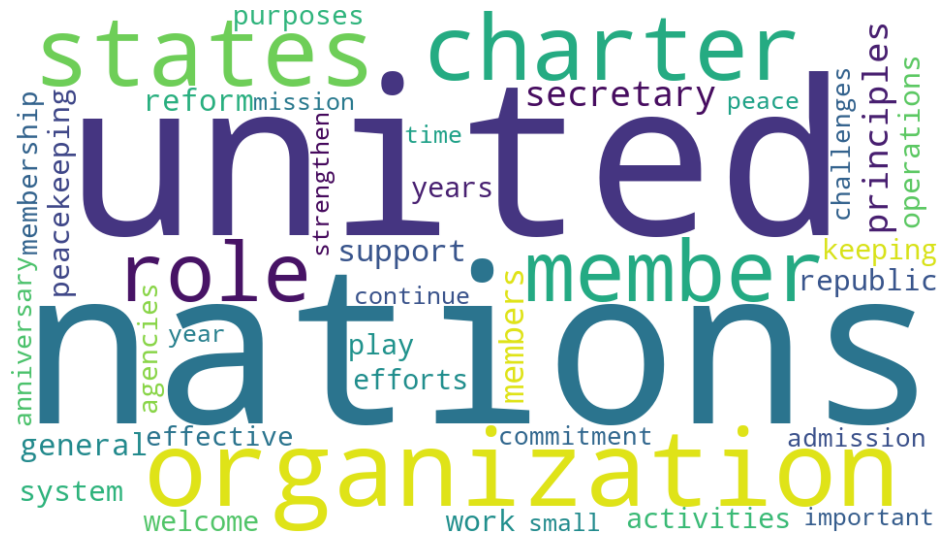

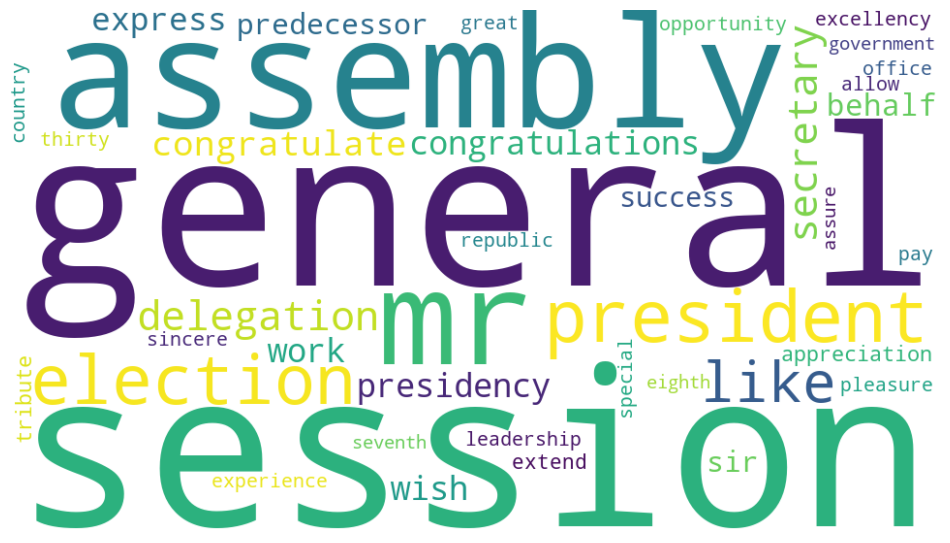

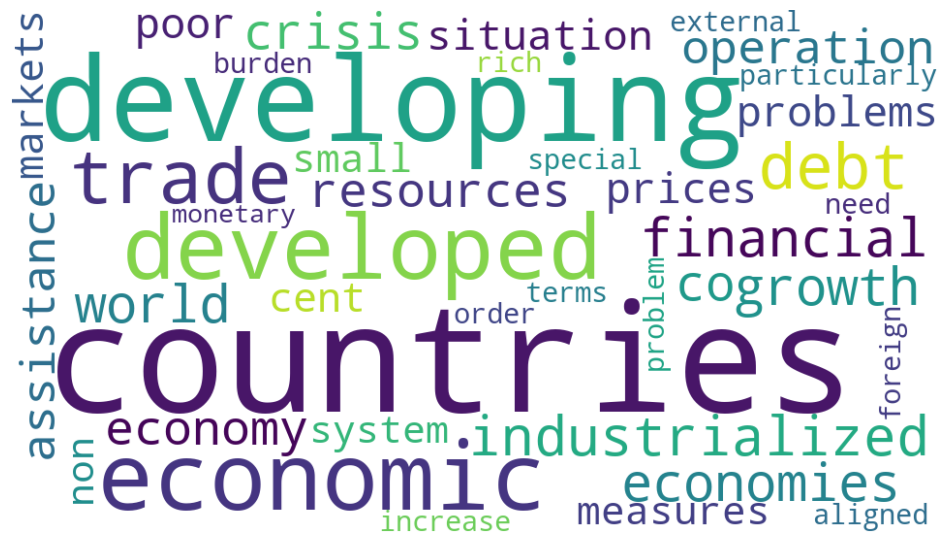

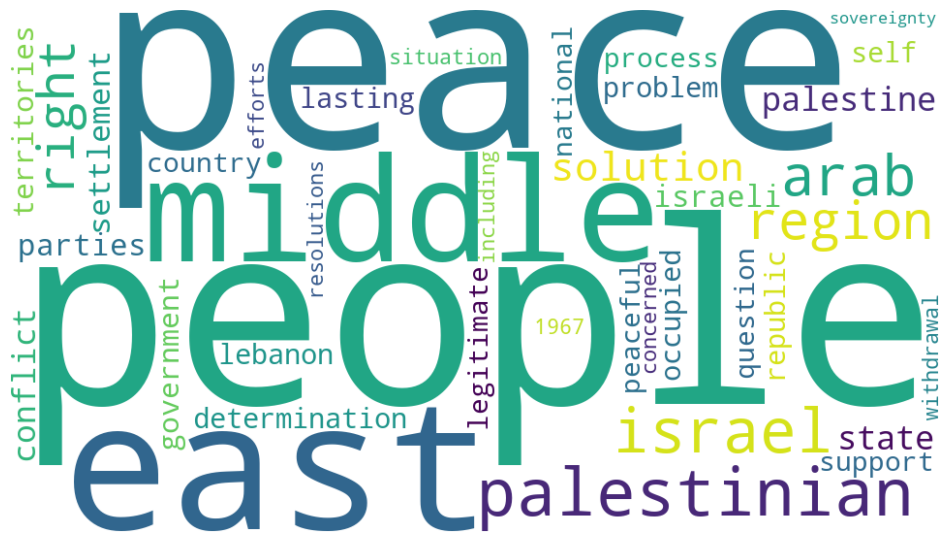

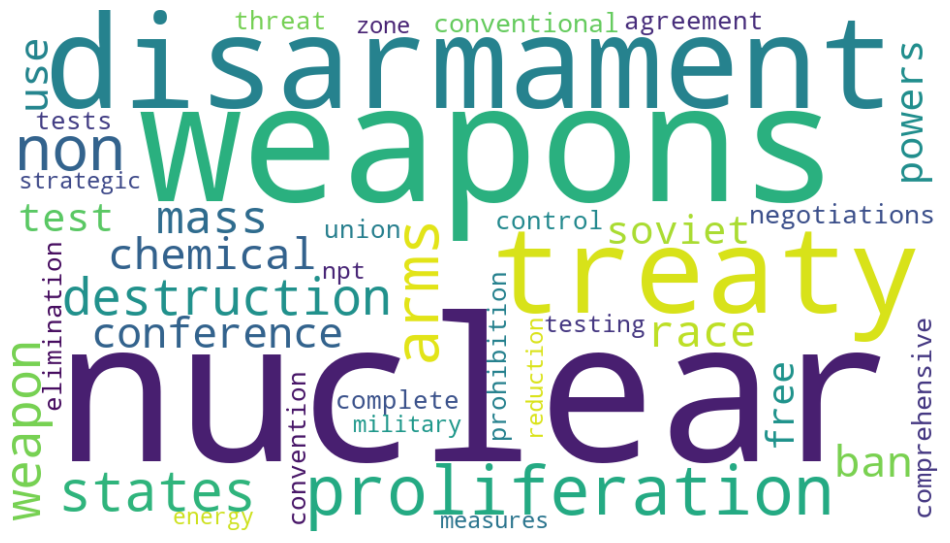

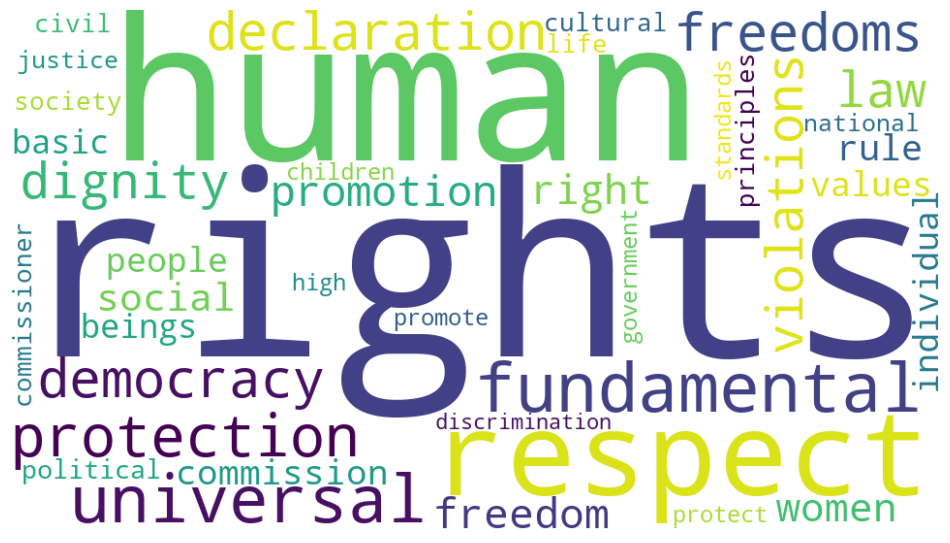

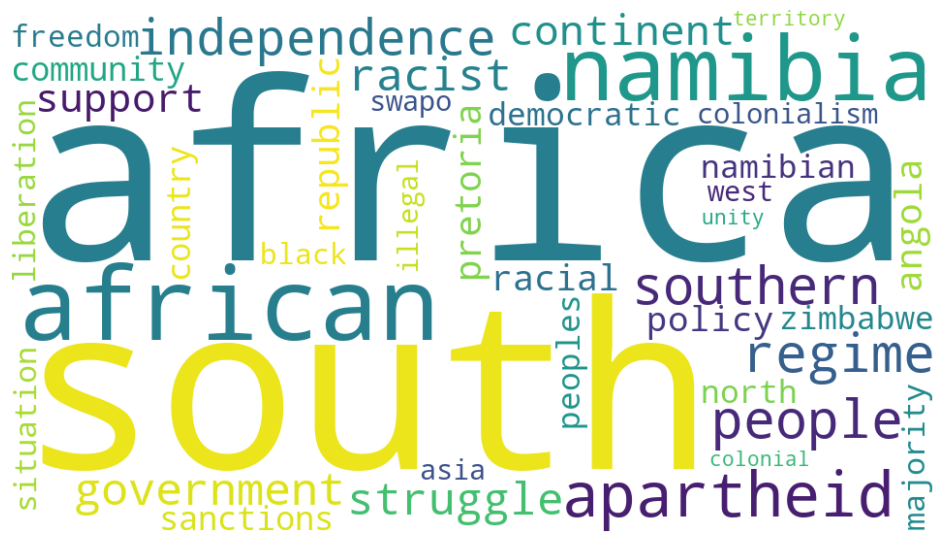

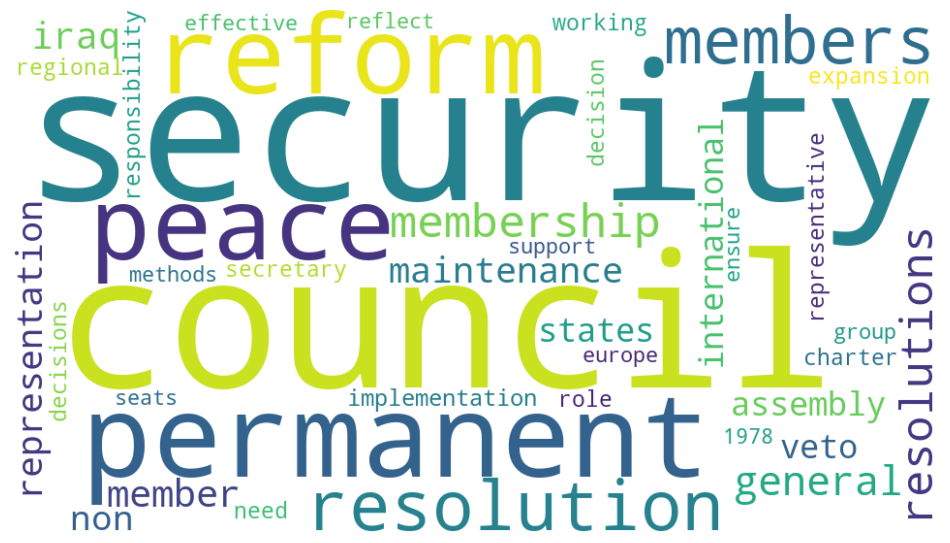

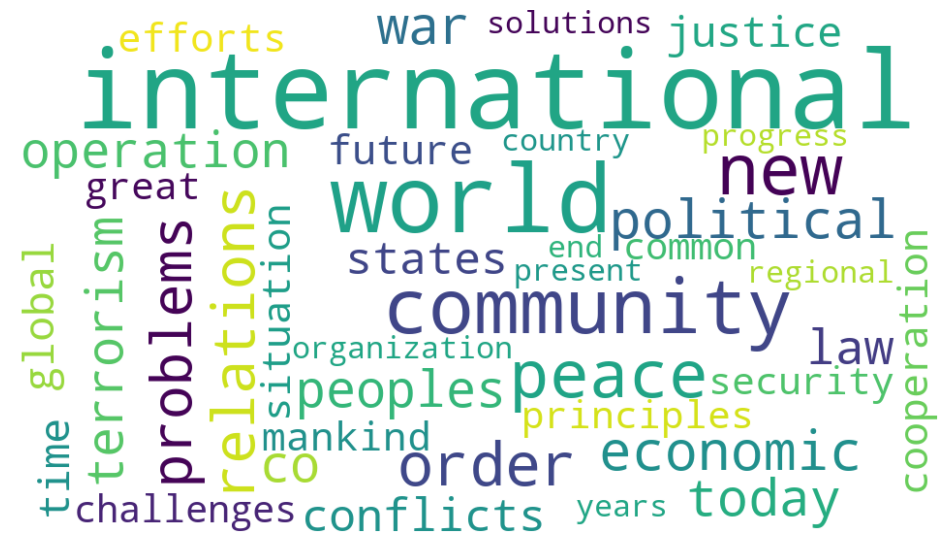

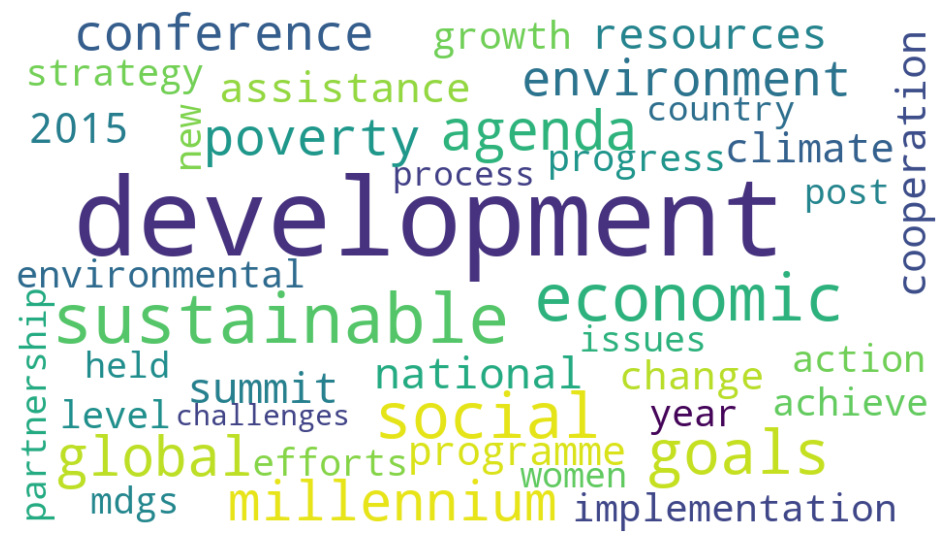

In [27]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


## LDA WORDCLOUD

THE FUNCTION `wordcloud_topics` IS CALLED TO GENERATE WORD CLOUDS FOR EACH TOPIC DERIVED FROM THE LDA (LATENT DIRICHLET ALLOCATION) TOPIC MODEL USING THE COUNT VECTORIZER'S FEATURE NAMES.

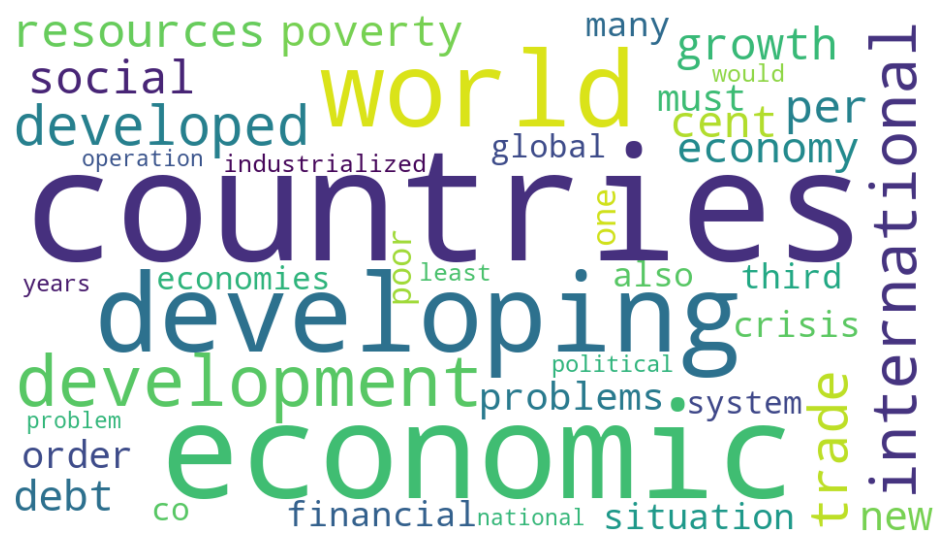

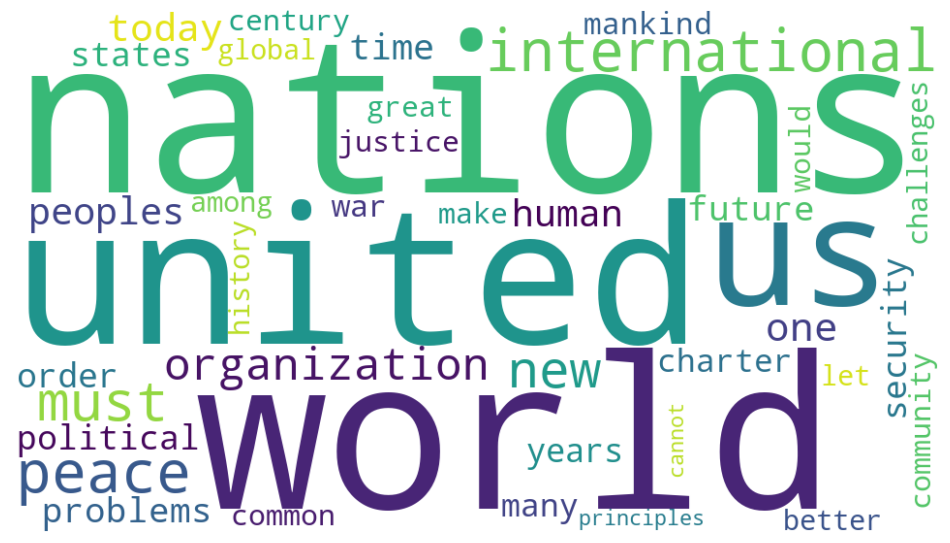

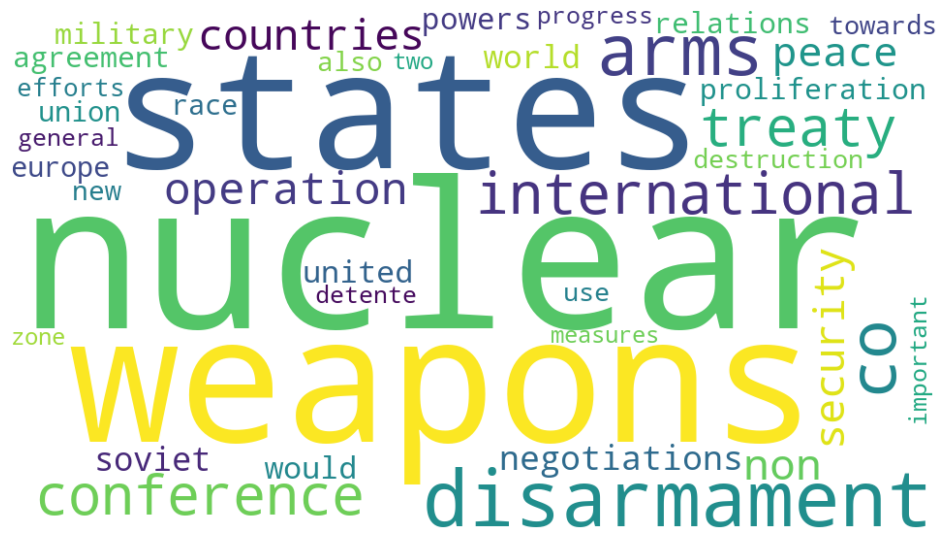

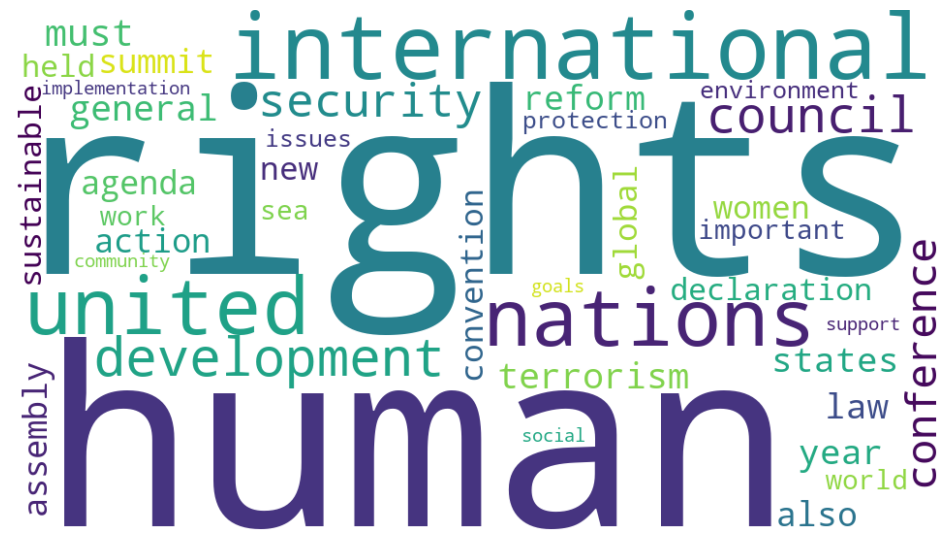

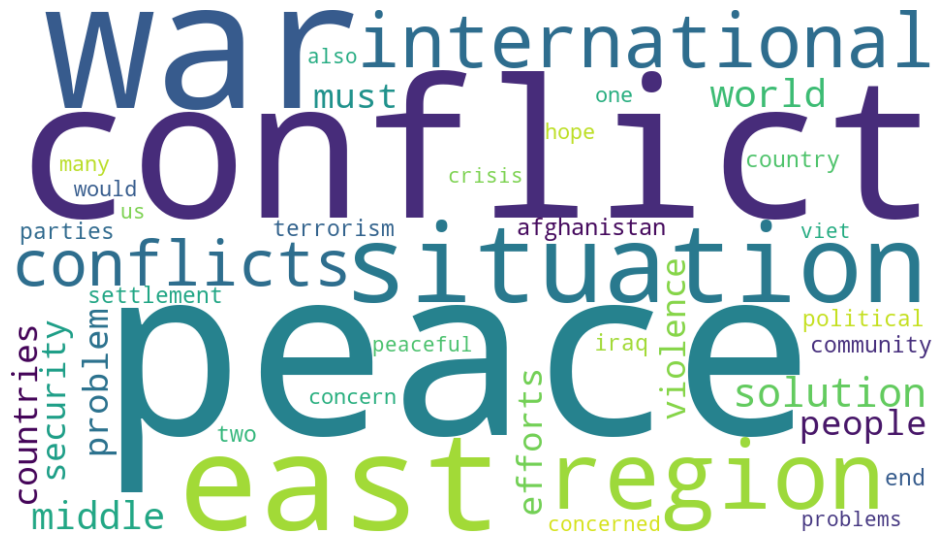

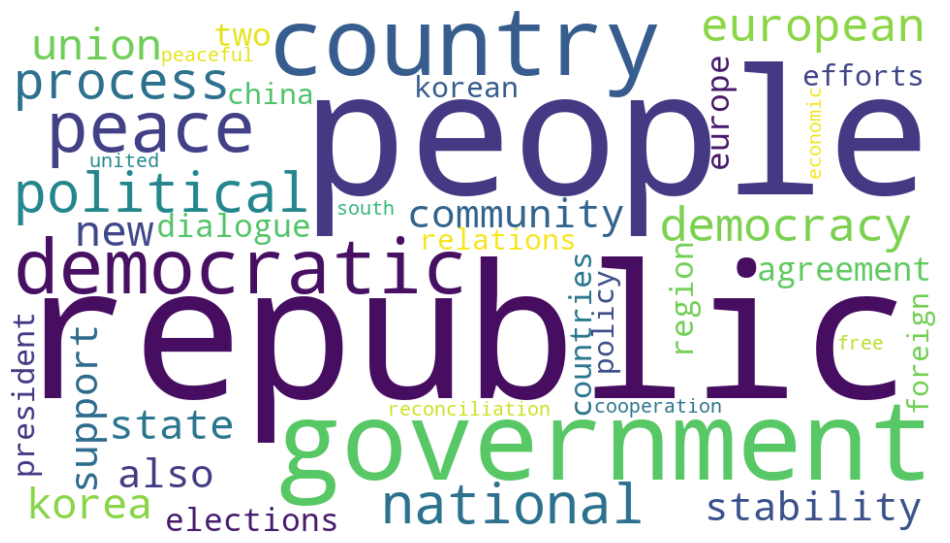

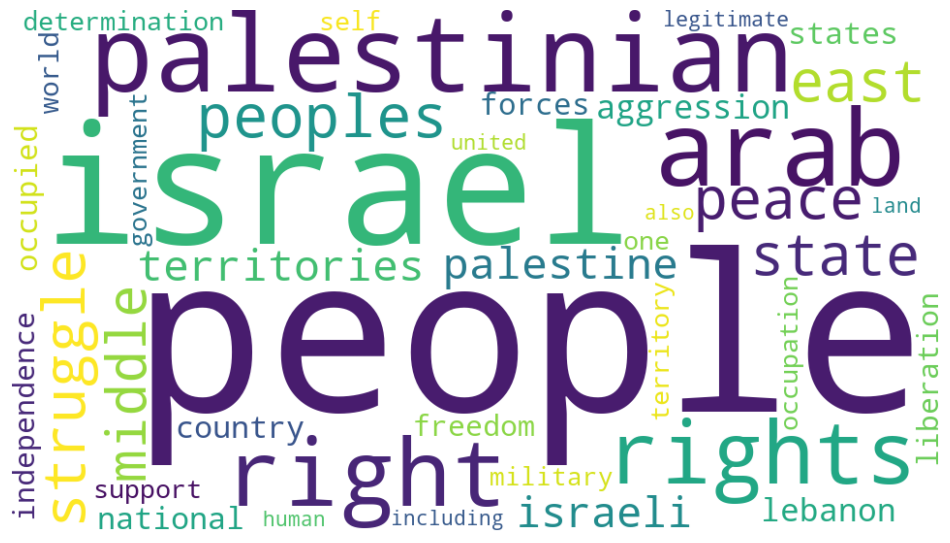

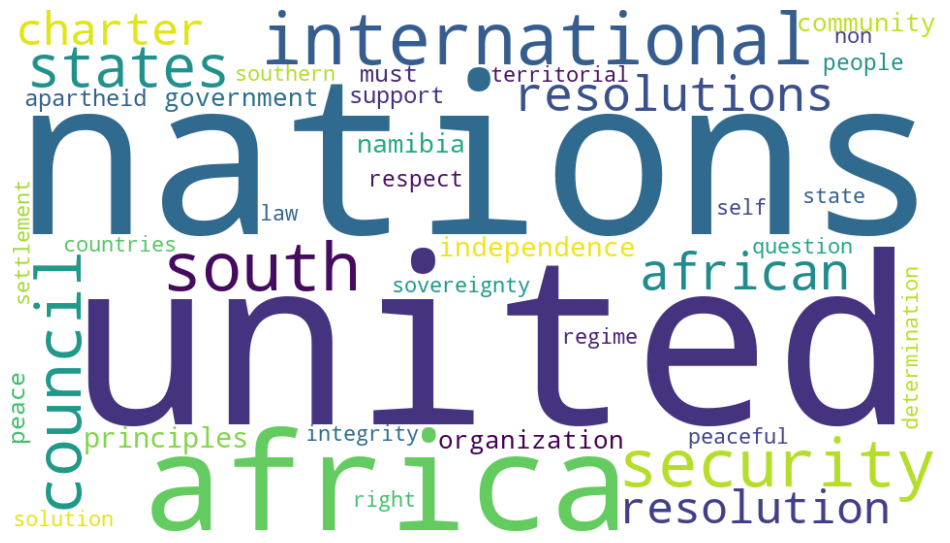

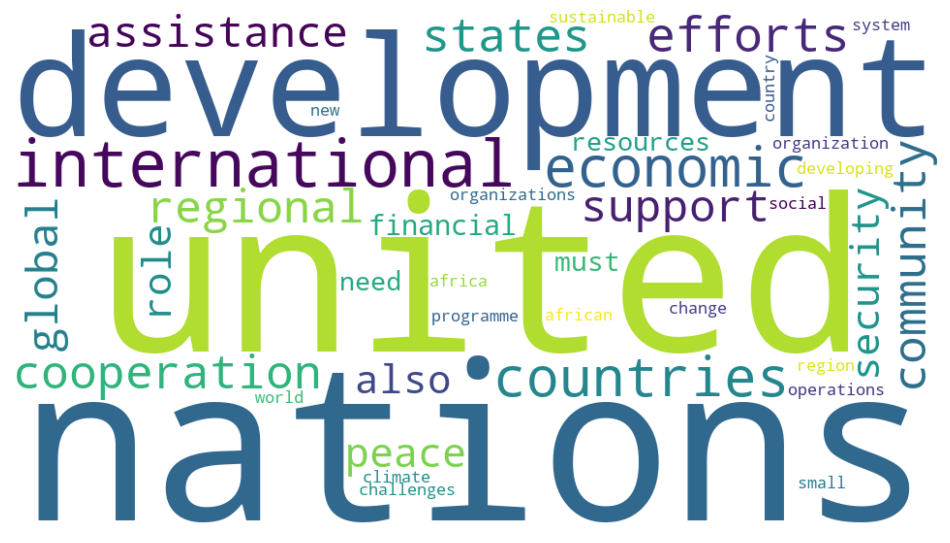

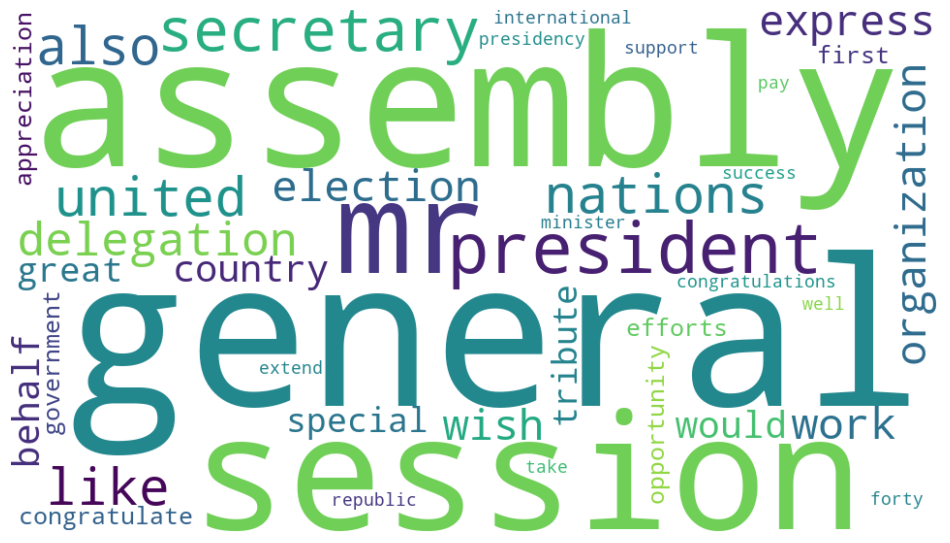

In [29]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


In [31]:
topic_names = []
voc = tfidf_para_vectorizer.vocabulary_
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = [word for word, index in voc.items() if index == important[-1]][0] + " " + [word for word, index in voc.items() if index == important[-2]][0]
    topic_names.append("Topic " + top_word)


## SEPERATE DATE BY YEAR

THE CODE ITERATES OVER UNIQUE YEARS IN THE DATASET AND CALCULATES THE TOPIC DISTRIBUTION FOR EACH YEAR USING NMF (NON-NEGATIVE MATRIX FACTORIZATION). THE RESULTING DATA, ALONG WITH THE CORRESPONDING YEAR, IS APPENDED TO `year_data`. A PROGRESS BAR IS DISPLAYED USING `tqdm`.

In [33]:
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["year"]))):
    W_year = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["year"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))


100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<00:00, 60.20it/s]


## DRAWING TIMECHART

THE CODE CREATES A DATAFRAME `df_year` USING THE `year_data` LIST GENERATED IN THE PREVIOUS SNIPPET. THEN, IT PLOTS AN AREA CHART SHOWING THE TOPIC DISTRIBUTION OVER THE YEARS USING MATPLOTLIB.

<Axes: xlabel='year'>

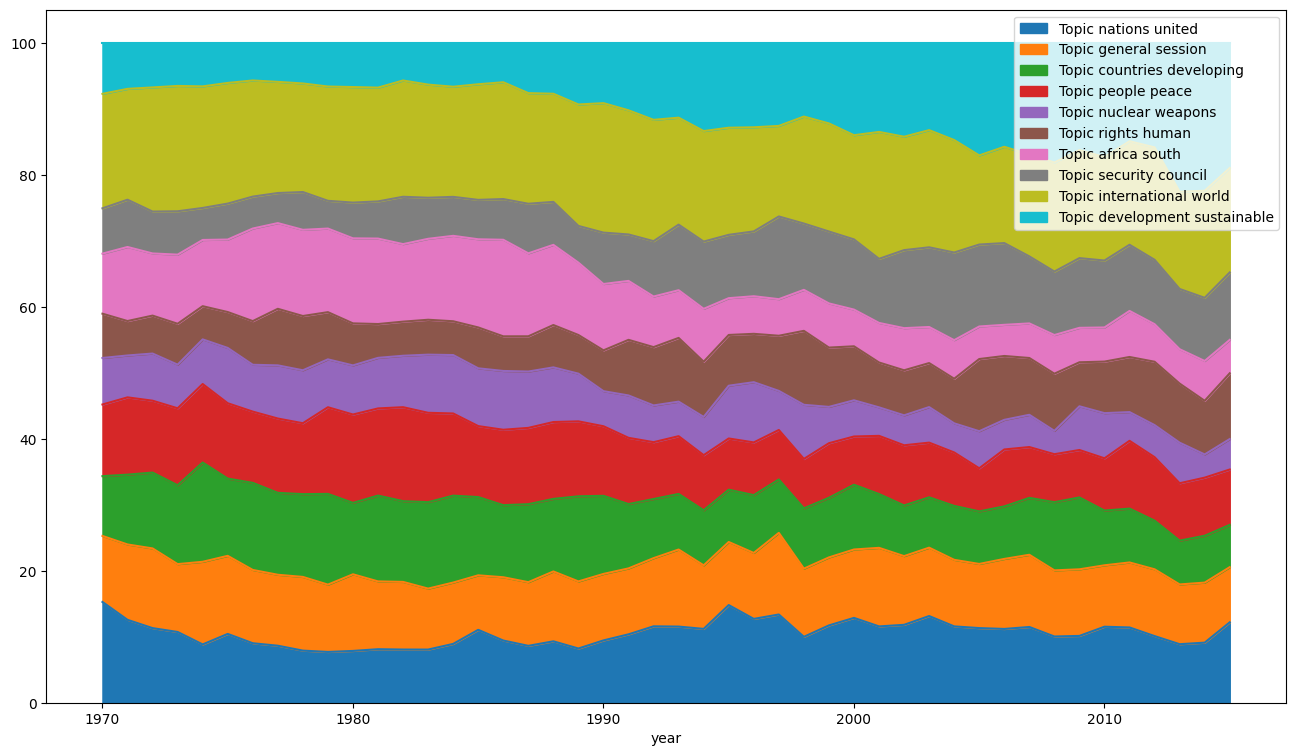

In [34]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["year"] + topic_names).set_index("year")
df_year.plot.area(figsize=(16,9))
